Q1:  multilayer perceptrons

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import numpy as np

In [2]:
#load data
(x_train1, y_train1), (x_test1, y_test1) = tf.keras.datasets.cifar10.load_data()
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.cifar100.load_data(label_mode="fine")


169001437/169001437 [==============================] - 6s 0us/step


In [4]:
print(x_train1.shape)
print(x_train2.shape)
print(x_test1.shape)
print(x_test2.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
#normalize pixel intensity values
x_train1 = x_train1/255
x_train2 = x_train2/255

x_test1 = x_test1/255
x_test2 = x_test2/255

In [4]:
#labels are one hot encoded
from keras.utils import to_categorical

y_one_hot1 = to_categorical(y_train1)


y_test_one_hot1 = to_categorical(y_test1)


y_one_hot2 = to_categorical(y_train2)


y_test_one_hot2 = to_categorical(y_test2)

In [7]:
print(y_one_hot1.shape)
print(y_test_one_hot1.shape)
print(y_one_hot2.shape)
print(y_test_one_hot2.shape)

(50000, 10)
(10000, 10)
(50000, 100)
(10000, 100)


In [5]:
#1 rgb image sized 32x32x3 is reshaped to 1 dimensional array of size 3072
x_train1 = x_train1.reshape(50000,3072)
x_train2 = x_train2.reshape(50000,3072)
x_test1 = x_test1.reshape(10000,3072)
x_test2 = x_test2.reshape(10000,3072)

In [55]:
#first sequential model for cifar10 dataset with 3 layers
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation = 'relu' ))
model.add(Dropout(.2))
model.add(Dense(10, activation = 'softmax' ))



In [56]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(1000), 
          validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 4s 78ms/step - loss: 2.2657 - accuracy: 0.1767 - val_loss: 2.0129 - val_accuracy: 0.2893
Epoch 2/10
40/40 [==============================] - 3s 66ms/step - loss: 1.9887 - accuracy: 0.2745 - val_loss: 1.8914 - val_accuracy: 0.3273
Epoch 3/10
40/40 [==============================] - 3s 72ms/step - loss: 1.8979 - accuracy: 0.3105 - val_loss: 1.8234 - val_accuracy: 0.3556
Epoch 4/10
40/40 [==============================] - 3s 74ms/step - loss: 1.8307 - accuracy: 0.3416 - val_loss: 1.7775 - val_accuracy: 0.3644
Epoch 5/10
40/40 [==============================] - 3s 66ms/step - loss: 1.7950 - accuracy: 0.3556 - val_loss: 1.7401 - val_accuracy: 0.3871
Epoch 6/10
40/40 [==============================] - 3s 64ms/step - loss: 1.7648 - accuracy: 0.3677 - val_loss: 1.7231 - val_accuracy: 0.3818
Epoch 7/10
40/40 [==============================] - 3s 65ms/step - loss: 1.7538 - accuracy: 0.3717 - val_loss: 1.6966 - val_accuracy: 0.3959
Epoch 8/10
40

In [58]:
results = model.evaluate(x_test1,  y_test_one_hot1, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [1.6049220561981201, 0.4318999946117401]


In [59]:
#for dataset cifar100
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(.2))
model1.add(Dense(100, activation = 'softmax' ))

In [60]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model1.fit(x_train2, y_one_hot2, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 3s 137ms/step - loss: 4.6407 - accuracy: 0.0176 - val_loss: 4.5426 - val_accuracy: 0.0265
Epoch 2/10
20/20 [==============================] - 3s 145ms/step - loss: 4.4933 - accuracy: 0.0302 - val_loss: 4.4175 - val_accuracy: 0.0377
Epoch 3/10
20/20 [==============================] - 2s 121ms/step - loss: 4.3676 - accuracy: 0.0397 - val_loss: 4.2640 - val_accuracy: 0.0497
Epoch 4/10
20/20 [==============================] - 2s 123ms/step - loss: 4.2452 - accuracy: 0.0505 - val_loss: 4.1465 - val_accuracy: 0.0727
Epoch 5/10
20/20 [==============================] - 2s 122ms/step - loss: 4.1610 - accuracy: 0.0629 - val_loss: 4.0632 - val_accuracy: 0.0866
Epoch 6/10
20/20 [==============================] - 3s 142ms/step - loss: 4.0853 - accuracy: 0.0740 - val_loss: 3.9919 - val_accuracy: 0.0989
Epoch 7/10
20/20 [==============================] - 3s 135ms/step - loss: 4.0360 - accuracy: 0.0790 - val_loss: 3.9456 - val_accuracy: 0.1081
Epoch 

In [62]:
results = model1.evaluate(x_test2,  y_test_one_hot2, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [3.8483757972717285, 0.12319999933242798]


#Q2: different network configurations

In [ ]:
#same model with dropout = 0.6 for cifar10 dataset
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(256, activation = 'relu'))
model2.add(Dropout(.6))
model2.add(Dense(128, activation = 'relu' ))
model2.add(Dropout(.6))
model2.add(Dense(10, activation = 'softmax' ))


In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model2.evaluate(x_test1,  y_test_one_hot1, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
#for dataset cifar100 with dropout 0.6
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(256, activation = 'relu'))
model3.add(Dropout(.6))
model3.add(Dense(100, activation = 'softmax' ))


In [ ]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(x_train2, y_one_hot2, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model3.evaluate(x_test2,  y_test_one_hot2, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
#same model without dropout for cifar10 dataset
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(256, activation = 'relu'))
#model2.add(Dropout(.6))
model4.add(Dense(128, activation = 'relu' ))
#model2.add(Dropout(.6))
model4.add(Dense(10, activation = 'softmax' ))


In [ ]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model4.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 4s 145ms/step - loss: 2.2687 - accuracy: 0.1784 - val_loss: 2.0489 - val_accuracy: 0.2592
Epoch 2/10
20/20 [==============================] - 3s 138ms/step - loss: 1.9642 - accuracy: 0.2970 - val_loss: 1.9237 - val_accuracy: 0.3235
Epoch 3/10
20/20 [==============================] - 3s 127ms/step - loss: 1.8741 - accuracy: 0.3416 - val_loss: 1.8728 - val_accuracy: 0.3387
Epoch 4/10
20/20 [==============================] - 2s 121ms/step - loss: 1.8122 - accuracy: 0.3672 - val_loss: 1.8087 - val_accuracy: 0.3664
Epoch 5/10
20/20 [==============================] - 3s 156ms/step - loss: 1.7640 - accuracy: 0.3818 - val_loss: 1.7760 - val_accuracy: 0.3755
Epoch 6/10
20/20 [==============================] - 2s 121ms/step - loss: 1.7334 - accuracy: 0.3948 - val_loss: 1.7456 - val_accuracy: 0.3868
Epoch 7/10
20/20 [==============================] - 2s 119ms/step - loss: 1.7044 - accuracy: 0.4019 - val_loss: 1.7277 - val_accuracy: 0.3945
Epoch 

In [ ]:
results = model4.evaluate(x_test1,  y_test_one_hot1, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
# compiling the same model with optimizer SGD
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model.evaluate(x_test1,  y_test_one_hot1, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
#for dataset cifar100 without dropout
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(256, activation = 'relu'))
#model5.add(Dropout(.2))
model5.add(Dense(100, activation = 'softmax' ))

In [ ]:
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.fit(x_train2, y_one_hot2, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model5.evaluate(x_test2,  y_test_one_hot2, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
# compiling the same model with optimizer SGD for cifar 100
model1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model1.fit(x_train2, y_one_hot2, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model1.evaluate(x_test2,  y_test_one_hot2, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
# model with no dropout and SGD as optimizer
model4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model4.evaluate(x_test1,  y_test_one_hot1, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
# model with no dropout and SGD as optimizer
model5.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.fit(x_train2, y_one_hot2, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model5.evaluate(x_test2,  y_test_one_hot2, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
# more layers and nodes for dataset cifar10

model6 = Sequential()
model6.add(Flatten())
model6.add(Dense(512, activation = 'relu'))
model6.add(Dropout(.2))
model6.add(Dense(256, activation = 'relu'))
model6.add(Dropout(.2))
model6.add(Dense(128, activation = 'relu' ))
model6.add(Dropout(.2))
model6.add(Dense(10, activation = 'softmax' ))


In [ ]:
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model6.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model6.evaluate(x_test1,  y_test_one_hot1, verbose = 0)
print('test loss, test acc:', results)

In [ ]:
#for dataset cifar100 model with more layers
model7 = Sequential()
model7.add(Flatten())
model7.add(Dense(512, activation = 'relu'))
model7.add(Dropout(.2))
model7.add(Dense(256, activation = 'relu'))
model7.add(Dropout(.2))
model7.add(Dense(100, activation = 'softmax' ))

In [ ]:
model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model7.fit(x_train2, y_one_hot2, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

In [ ]:
results = model7.evaluate(x_test2,  y_test_one_hot2, verbose = 0)
print('test loss, test acc:', results)

#Question 3

In [75]:
model8 = Sequential()
model8.add(Dense(3072, activation = 'relu'))
#model8.add(Dense(128, activation = 'relu'))
model8.add(Dense(10, activation = 'softmax' ))


In [76]:
model8.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model8.fit(x_train1, y_one_hot1, epochs=10, 
          batch_size=(2000), 
          validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 40s 2s/step - loss: 7.8384 - accuracy: 0.1412 - val_loss: 2.5715 - val_accuracy: 0.1336
Epoch 2/10
20/20 [==============================] - 41s 2s/step - loss: 2.2184 - accuracy: 0.1873 - val_loss: 2.0787 - val_accuracy: 0.2627
Epoch 3/10
20/20 [==============================] - 35s 2s/step - loss: 2.0031 - accuracy: 0.2921 - val_loss: 1.9530 - val_accuracy: 0.3049
Epoch 4/10
20/20 [==============================] - 35s 2s/step - loss: 1.9101 - accuracy: 0.3259 - val_loss: 1.8943 - val_accuracy: 0.3341
Epoch 5/10
20/20 [==============================] - 32s 2s/step - loss: 1.8514 - accuracy: 0.3518 - val_loss: 1.8390 - val_accuracy: 0.3504
Epoch 6/10
20/20 [==============================] - 35s 2s/step - loss: 1.7979 - accuracy: 0.3688 - val_loss: 1.8023 - val_accuracy: 0.3651
Epoch 7/10
20/20 [==============================] - 34s 2s/step - loss: 1.7587 - accuracy: 0.3826 - val_loss: 1.7745 - val_accuracy: 0.3708
Epoch 8/10
20/20 [==

In [78]:
model8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (2000, 3072)              9440256   
                                                                 
 dense_6 (Dense)             (2000, 10)                30730     
                                                                 
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


In [79]:
#trainable weights of each layer
# a is last layer, c is first layer
a = model8.layers[2].weights[0]
b = model8.layers[1].weights[0]
c = model8.layers[0].weights[0]


In [81]:
model8.layers[0].weights[0]

<tf.Variable 'dense_5/kernel:0' shape=(3072, 3072) dtype=float32, numpy=
array([[-0.01693588, -0.00729624, -0.02538426, ..., -0.03713127,
        -0.00158427, -0.006359  ],
       [ 0.01042881, -0.00626803,  0.01878196, ..., -0.0354787 ,
        -0.0197454 , -0.02870552],
       [ 0.03154113,  0.02432134, -0.00724443, ...,  0.01308486,
         0.01961856, -0.01086926],
       ...,
       [ 0.01936872, -0.02639729,  0.0132981 , ..., -0.00193033,
         0.00106561,  0.01173532],
       [ 0.01315036, -0.02787237, -0.02343399, ...,  0.02426468,
         0.01495557, -0.00170782],
       [-0.02346553,  0.02296077,  0.00074323, ...,  0.01430566,
        -0.01825502,  0.00440774]], dtype=float32)>

In [82]:
#take transpose of each array vector
a = np.transpose(a)
b = np.transpose(b)
c = np.transpose(c)

In [83]:
##weights related second node of the layer are saved
d = a[1]
e = b[1]
f = c[1]

In [84]:
e.shape

(3072,)

In [85]:
f.shape

(3072,)

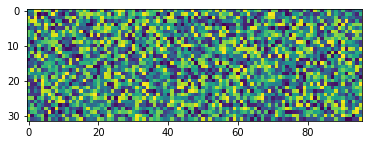

In [86]:
import numpy as np
import matplotlib.pyplot as plt

f = np.array(f)
f = f.reshape((32, 32*3))
plt.imshow(f.astype('float'))
plt.show()

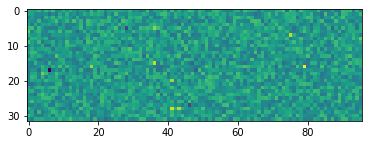

In [87]:
e = np.array(e)
e = e.reshape((32, 32*3))
plt.imshow(e.astype('float'))
plt.show()

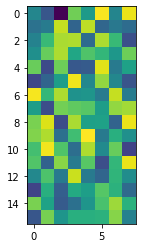

In [72]:
d = np.array(d)
d = d.reshape((16, 8))
plt.imshow(d.astype('float'))
plt.show()